In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../data/multi_thread_relaxed_writes2.csv')

In [4]:
df.groupby('tid').count()

,time,iteration,cpu,v1,v2,v3,v4
tid,,,,,,,
0,1000000,1000000,1000000,1000000,1000000,1000000,1000000
1,1000000,1000000,1000000,1000000,1000000,1000000,1000000
2,1000000,1000000,1000000,1000000,1000000,1000000,1000000
3,1000000,1000000,1000000,1000000,1000000,1000000,1000000


In [5]:
df

,tid,time,iteration,cpu,v1,v2,v3,v4
0,0,1697620024545658617,0,3,1,0,0,0
1,0,1697620024545740343,1,3,2,1,1,1
2,0,1697620024545741260,2,3,3,1,2,1
3,0,1697620024545741803,3,3,4,1,2,1
4,0,1697620024545742100,4,3,5,1,2,1
...,...,...,...,...,...,...,...,...
3999995,3,1697620024956639288,999995,4,1000000,988903,1000000,999996
3999996,3,1697620024956639609,999996,4,1000000,988905,1000000,999997
3999997,3,1697620024956639963,999997,4,1000000,988907,1000000,999998
3999998,3,1697620024956640289,999998,4,1000000,988908,1000000,999999


In [372]:
df.groupby('tid').apply(lambda x: x.groupby('cpu').count() / x.count()).iteration.sort_values()

tid  cpu
0    8      0.002723
     3      0.015107
2    11     0.067299
1    0      0.283834
     10     0.716166
2    0      0.932701
0    2      0.982170
3    4      1.000000
Name: iteration, dtype: float64

In [373]:
df.groupby('cpu').apply(lambda x: x.groupby('tid').count() / x.count()).iteration

cpu  tid
0    1      0.233313
     2      0.766687
2    0      1.000000
3    0      1.000000
4    3      1.000000
8    0      1.000000
10   1      1.000000
11   2      1.000000
Name: iteration, dtype: float64

In [6]:
tid0 = df[df.tid == 0]
tid1 = df[df.tid == 1]
tid2 = df[df.tid == 2]
tid3 = df[df.tid == 3]

In [381]:
switchPoints = tid0[tid0.cpu != tid0.shift(1).cpu]

In [382]:
switchPoints

,tid,time,iteration,cpu,v1,v2,v3,v4
0,0,1697620024545658617,0,3,1,0,0,0
831,0,1697620024546050117,831,2,832,539,547,573
507290,0,1697620024719114000,507290,3,507291,387939,524289,421508
521566,0,1697620024737048949,521566,8,521567,432523,524289,468344
524289,0,1697620024761668097,524289,2,524290,497674,574874,524289


In [273]:
switchPoints

,tid,time,iteration,cpu,v1,v2,v3,v4
2000000,2,1697613682657305720,0,9,129,1004,1,244
2763503,2,1697613682981092499,763503,2,845210,1000000,763504,782738


In [289]:
timeWindow = df[(df.time >= 1697613682981092499) & (df.time <= 1697613682981092499)]

In [290]:
timeWindow[(timeWindow.tid == 0) & (abs(timeWindow.iteration - 763503) < 10)][['time', 'cpu', 'v1', 'v2', 'v3', 'v4']]

,time,cpu,v1,v2,v3,v4
2763494,1697613682981067678,9,845125,1000000,763495,782654
2763495,1697613682981069555,9,845126,1000000,763496,782660
2763496,1697613682981069921,9,845127,1000000,763497,782662
2763497,1697613682981070324,9,845129,1000000,763498,782663
2763498,1697613682981070701,9,845130,1000000,763499,782664
2763499,1697613682981071019,9,845131,1000000,763500,782665
2763500,1697613682981071371,9,845133,1000000,763501,782666
2763501,1697613682981071712,9,845134,1000000,763502,782667
2763502,1697613682981072041,9,845210,1000000,763503,782668
2763503,1697613682981092499,2,845210,1000000,763504,782738


In [294]:
timeWindow[(timeWindow.cpu == 2)].tid.unique()

array([2])

In [190]:
pd.options.display.max_rows = 300

In [7]:
d1 = tid0[['time', 'v1']].set_index('time')
d2 = tid1[['time', 'v2']].set_index('time')
d3 = tid2[['time', 'v3']].set_index('time')
d4 = tid3[['time', 'v4']].set_index('time')
# df2.ffill().bfill().sort_index()

In [8]:
def mergeIx(a, b):
    return a.merge(b, how='outer', left_index=True, right_index=True)

sourceOfTruth = mergeIx(mergeIx(mergeIx(d1, d2), d3), d4).ffill().bfill()

In [9]:
sourceOfTruth

,v1,v2,v3,v4
time,,,,
1697620024545658617,1.0,1.0,1.0,1.0
1697620024545673723,1.0,1.0,1.0,1.0
1697620024545710137,1.0,1.0,1.0,1.0
1697620024545710193,1.0,1.0,1.0,1.0
1697620024545740343,2.0,1.0,1.0,1.0
...,...,...,...,...
1697620024958601221,1000000.0,999996.0,1000000.0,1000000.0
1697620024958601370,1000000.0,999997.0,1000000.0,1000000.0
1697620024958601517,1000000.0,999998.0,1000000.0,1000000.0


<Axes: xlabel='time'>

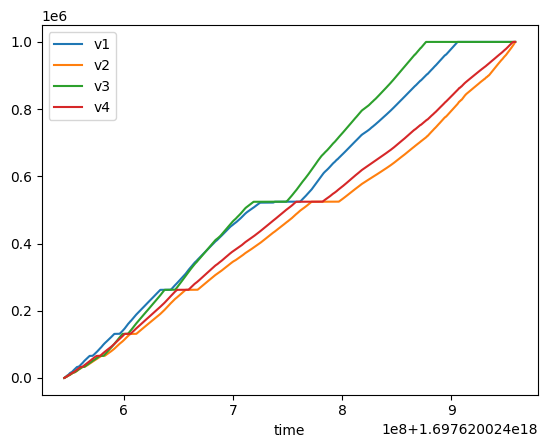

In [10]:
sourceOfTruth.plot()

In [316]:
sourceOfTruth.groupby('v1').count().sort_values('v2')['v2'].tail(15)

v1
857170.0        534
2049.0          671
836540.0        679
798367.0        681
741330.0        683
65.0            828
4097.0         1394
8193.0         2666
16385.0        5280
32769.0       10524
65537.0       20795
131073.0      40638
262145.0      79663
1000000.0    113234
524289.0     171632
Name: v2, dtype: int64

In [313]:
sourceOfTruth.groupby('v2').count().sort_values('v1')['v1'].tail(10)

v2
2049.0          591
4097.0         1296
8193.0         2665
16385.0        5653
32769.0       10127
65537.0       20185
131073.0      39846
262145.0      77903
524289.0     160548
1000000.0    616140
Name: v1, dtype: int64

In [314]:
sourceOfTruth.groupby('v3').count().sort_values('v2')['v2'].tail(10)

v3
1.0            1380
4097.0         1627
8193.0         3167
16385.0        6249
32769.0       11389
65537.0       22491
131073.0      46573
1000000.0     46682
262145.0      92183
524289.0     180128
Name: v2, dtype: int64

In [315]:
sourceOfTruth.groupby('v4').count().sort_values('v2')['v2'].tail(10)

v4
1.0            642
2049.0        1037
4097.0        1743
8193.0        3032
16385.0       6343
32769.0      12077
65537.0      24286
131073.0     47327
262145.0     89518
524289.0    170925
Name: v2, dtype: int64

<Axes: xlabel='v4'>

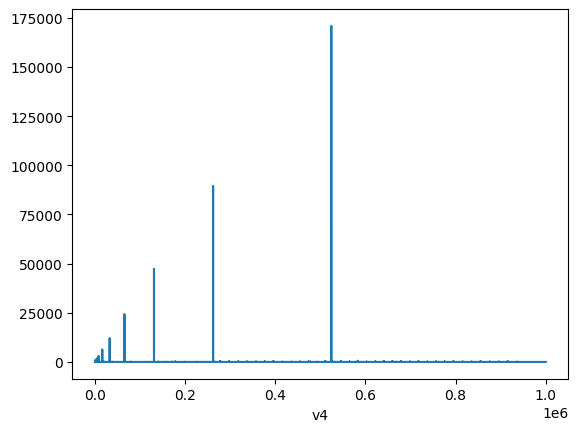

In [325]:
sourceOfTruth.groupby('v4').count().v1.plot()

In [348]:
x = sourceOfTruth.groupby('v4').count()

<Axes: xlabel='v4'>

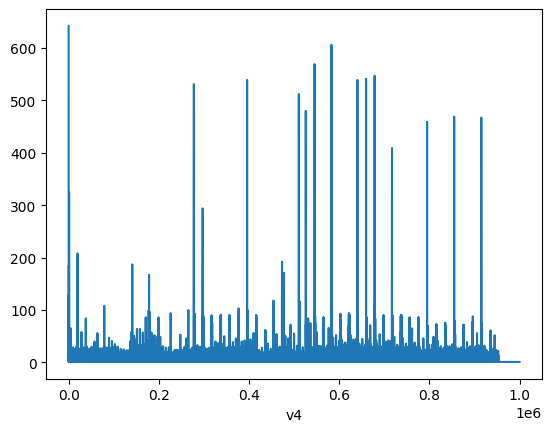

In [340]:
x.v1[x.v1 < 1000].plot()

In [355]:
x.v1[(x.index.map(lambda x: int(x - 1).bit_count() != 1)) & (x.v1 > 100)].apply(lambda a: bin(a))

v4
1.0         0b1010000010
19702.0       0b11010000
78980.0        0b1101100
141133.0      0b10111011
178335.0      0b10100111
277756.0    0b1000010011
297248.0     0b100100110
376935.0       0b1100111
395749.0    0b1000011011
454458.0       0b1110110
473246.0      0b11000000
477491.0      0b10101011
510524.0    0b1000000000
512143.0       0b1110101
525899.0     0b111100000
545393.0    0b1000111001
582820.0    0b1001011110
640395.0    0b1000011011
659604.0    0b1000011101
678556.0    0b1000100011
679117.0       0b1110000
717144.0     0b110011001
794926.0     0b111001011
854975.0     0b111010101
915144.0     0b111010011
Name: v1, dtype: object

In [17]:
cpu0 = df[df.cpu == 0].set_index('time')[['tid', 'v1', 'v2', 'v3', 'v4']]
cpu8 = df[df.cpu == 8].set_index('time')[['tid', 'v1', 'v2', 'v3', 'v4']]
cpu2 = df[df.cpu == 2].set_index('time')[['tid', 'v1', 'v2', 'v3', 'v4']]
cpu3 = df[df.cpu == 3].set_index('time')[['tid', 'v1', 'v2', 'v3', 'v4']]

In [18]:
cpu0State = cpu0.merge(sourceOfTruth, how='left', left_index=True, right_index=True)
cpu8State = cpu8.merge(sourceOfTruth, how='left', left_index=True, right_index=True)
cpu2State = cpu2.merge(sourceOfTruth, how='left', left_index=True, right_index=True)
cpu3State = cpu3.merge(sourceOfTruth, how='left', left_index=True, right_index=True)

In [19]:
cpu0State

,tid,v1_x,v2_x,v3_x,v4_x,v1_y,v2_y,v3_y,v4_y
time,,,,,,,,,
1697620024582056027,2,100985,65537,67300,75848,100987.0,65537.0,67300.0,75849.0
1697620024582056884,2,100991,65537,67301,75851,100991.0,65537.0,67301.0,75851.0
1697620024582057384,2,100992,65537,67302,75853,100993.0,65537.0,67302.0,75853.0
1697620024582057671,2,100994,65537,67303,75853,100994.0,65537.0,67303.0,75854.0
1697620024582057959,2,100995,65537,67304,75854,100995.0,65537.0,67304.0,75854.0
...,...,...,...,...,...,...,...,...,...
1697620024958601221,1,1000000,999996,1000000,1000000,1000000.0,999996.0,1000000.0,1000000.0
1697620024958601370,1,1000000,999997,1000000,1000000,1000000.0,999997.0,1000000.0,1000000.0
1697620024958601517,1,1000000,999998,1000000,1000000,1000000.0,999998.0,1000000.0,1000000.0


In [22]:
cpu0State['v1d'] = cpu0State['v1_y'] - cpu0State['v1_x']
cpu0State['v2d'] = cpu0State['v2_y'] - cpu0State['v2_x']
cpu0State['v3d'] = cpu0State['v3_y'] - cpu0State['v3_x']
cpu0State['v4d'] = cpu0State['v4_y'] - cpu0State['v4_x']

<Axes: >

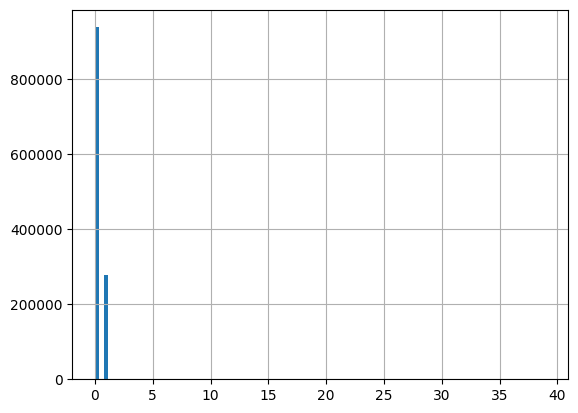

In [34]:
cpu0State['v1d'].hist(bins=100)

<Axes: xlabel='time'>

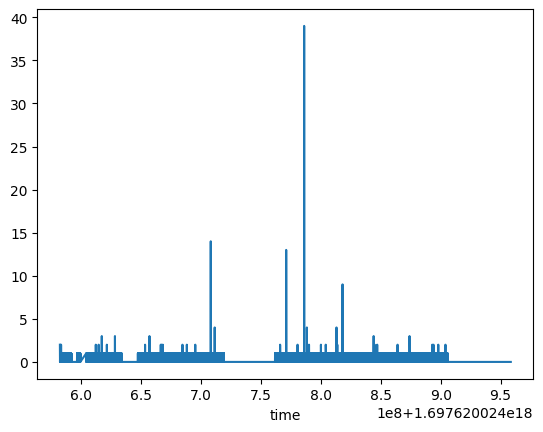

In [29]:
cpu0State['v1d'].sort_index().plot()

In [38]:
cpu0State[['v1_x', 'v1_y', 'v1d']].sort_values('v1d')

,v1_x,v1_y,v1d
time,,,
1697620024876944791,900713,900713.0,0.0
1697620024692916372,433941,433941.0,0.0
1697620024692916636,433942,433942.0,0.0
1697620024692916851,433943,433943.0,0.0
1697620024692917130,433944,433944.0,0.0
...,...,...,...
1697620024813034348,706886,706890.0,4.0
1697620024818095802,723578,723587.0,9.0
1697620024771037532,556954,556967.0,13.0


In [39]:
cpu0State[['v4_x', 'v4_y', 'v4d']].sort_values('v4d')

,v4_x,v4_y,v4d
time,,,
1697620024679242957,320467,320467.0,0.0
1697620024699070004,374387,374387.0,0.0
1697620024699070274,374388,374388.0,0.0
1697620024699070612,374389,374389.0,0.0
1697620024837834542,662998,662998.0,0.0
...,...,...,...
1697620024676822818,313359,313360.0,1.0
1697620024788310280,539090,539092.0,2.0
1697620024688034921,344439,344441.0,2.0


<Axes: xlabel='time'>

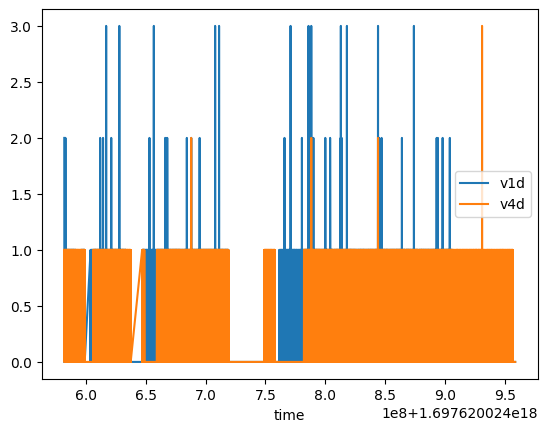

In [51]:
cpu0State[['v1d', 'v4d']].clip(0, 3).sort_index().plot()

In [55]:
a = cpu0State.sort_index().tid
a[a.shift(1) != a]

time
1697620024582056027    2
1697620024877039928    1
Name: tid, dtype: int64

In [64]:
tid1[tid1.time <= 1697620024877039928].sort_index().tail(10)

,tid,time,iteration,cpu,v1,v2,v3,v4
1716157,1,1697620024877037132,716157,10,901045,716158,1000000,766368
1716158,1,1697620024877037445,716158,10,901046,716159,1000000,766369
1716159,1,1697620024877037746,716159,10,901047,716160,1000000,766370
1716160,1,1697620024877038050,716160,10,901048,716161,1000000,766371
1716161,1,1697620024877038354,716161,10,901049,716162,1000000,766372
1716162,1,1697620024877038670,716162,10,901050,716163,1000000,766373
1716163,1,1697620024877038977,716163,10,901051,716164,1000000,766374
1716164,1,1697620024877039296,716164,10,901052,716165,1000000,766375
1716165,1,1697620024877039599,716165,10,901053,716166,1000000,766376
1716166,1,1697620024877039928,716166,0,901054,716167,1000000,766377


In [61]:
cpu0State[cpu0State.index >= 1697620024876944791].sort_index()

,tid,v1_x,v2_x,v3_x,v4_x,v1_y,v2_y,v3_y,v4_y,v1d,v2d,v3d,v4d
time,,,,,,,,,,,,,
1697620024876944791,2,900713,715895,1000000,766091,900713.0,715895.0,1000000.0,766092.0,0.0,0.0,0.0,1.0
1697620024877039928,1,901054,716167,1000000,766377,901055.0,716167.0,1000000.0,766378.0,1.0,0.0,0.0,1.0
1697620024877053778,1,901115,716168,1000000,766424,901116.0,716168.0,1000000.0,766425.0,1.0,0.0,0.0,1.0
1697620024877054158,1,901117,716169,1000000,766425,901117.0,716169.0,1000000.0,766426.0,0.0,0.0,0.0,1.0
1697620024877054503,1,901119,716170,1000000,766426,901119.0,716170.0,1000000.0,766427.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697620024958601221,1,1000000,999996,1000000,1000000,1000000.0,999996.0,1000000.0,1000000.0,0.0,0.0,0.0,0.0
1697620024958601370,1,1000000,999997,1000000,1000000,1000000.0,999997.0,1000000.0,1000000.0,0.0,0.0,0.0,0.0
1697620024958601517,1,1000000,999998,1000000,1000000,1000000.0,999998.0,1000000.0,1000000.0,0.0,0.0,0.0,0.0


In [72]:
pd.options.display.max_rows = 500

In [81]:
dat = df.pivot(index='time', columns='cpu', values='v1').ffill().dropna().drop(11, axis=1)

In [82]:
dat

cpu,0,2,3,4,8,10
time,,,,,,
1697620024737048949,507268.0,507290.0,521566.0,521566.0,521567.0,521566.0
1697620024737049256,507268.0,507290.0,521566.0,521567.0,521567.0,521566.0
1697620024737049290,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737049640,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737049672,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
...,...,...,...,...,...,...
1697620024958601221,1000000.0,1000000.0,521566.0,1000000.0,524289.0,901053.0
1697620024958601370,1000000.0,1000000.0,521566.0,1000000.0,524289.0,901053.0
1697620024958601517,1000000.0,1000000.0,521566.0,1000000.0,524289.0,901053.0


In [88]:
tid0.set_index('time').loc[1697620024737048949]

tid               0
iteration    521566
cpu               8
v1           521567
v2           432523
v3           524289
v4           468344
Name: 1697620024737048949, dtype: int64

In [85]:
dat.head(500)

cpu,0,2,3,4,8,10
time,,,,,,
1697620024737048949,507268.0,507290.0,521566.0,521566.0,521567.0,521566.0
1697620024737049256,507268.0,507290.0,521566.0,521567.0,521567.0,521566.0
1697620024737049290,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737049640,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737049672,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737050020,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737050054,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737050398,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0
1697620024737050456,507268.0,507290.0,521566.0,521567.0,521567.0,521567.0


In [90]:
x = df.set_index('time').sort_index().loc[1697620024737048949:1697620024737122337]
x

,tid,iteration,cpu,v1,v2,v3,v4
time,,,,,,,
1697620024737048949,0,521566,8,521567,432523,524289,468344
1697620024737049256,3,468348,4,521567,432527,524289,468349
1697620024737049290,1,432527,10,521567,432528,524289,468348
1697620024737049640,3,468349,4,521567,432528,524289,468350
1697620024737049672,1,432528,10,521567,432529,524289,468349
1697620024737050020,3,468350,4,521567,432529,524289,468351
1697620024737050054,1,432529,10,521567,432530,524289,468350
1697620024737050398,3,468351,4,521567,432530,524289,468352
1697620024737050456,1,432530,10,521567,432531,524289,468351


In [97]:
tid2.set_index('time').sort_index().head(524290)

,tid,iteration,cpu,v1,v2,v3,v4
time,,,,,,,
1697620024545710137,2,0,11,1,1,1,0
1697620024545741069,2,1,11,2,1,2,1
1697620024545742649,2,2,11,5,1,3,1
1697620024545743589,2,3,11,9,1,4,1
1697620024545744010,2,4,11,9,1,5,1
...,...,...,...,...,...,...,...
1697620024719067593,2,524285,0,507261,387821,524286,421385
1697620024719067925,2,524286,0,507262,387822,524287,421386
1697620024719068340,2,524287,0,507263,387823,524288,421387


In [95]:
1697620024737048949 - 1697620024737122337

-73388